In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("data/tmdb_5000_movies.csv")

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

### Lets select the columns which are not important\
(ie): Can't give information which is useful for recommendation
* **Budget**- People don't watch movie based on it's budget, rather they watch for story and execution.
* **homepage** - movie's website is irrelevant in choosing to watch a movie
* **original language** - The dataset has 99% OF "EN", If we consider this feature..there's a huge data imbalance.
* **original_title** - We will consider "Title" feature, as this might have titles in other languages
* **popularity** - We are ignoring this feature
* **production_companies, production_countries** - people barely watch movies based on - if the movie is shot in a particular country or by a particular production.
* **release_date, revenue,runtime,spoken_languages,status**
* **Tagline** - the tagline often doesn't give info about what the movie is 
* **vote_average,vote_count**
* **Id** - as the "credits" dataset has the same

In [5]:
movies = movies[["genres","keywords","overview","title"]]

In [6]:
movies.head()

,genres,keywords,overview,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter


In [7]:
credits = pd.read_csv("data/tmdb_5000_credits.csv")

In [8]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies = movies.merge(credits,on = "title")

In [10]:
movies.shape

(4809, 7)

In [11]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies.isnull().sum()

genres      0
keywords    0
overview    3
title       0
movie_id    0
cast        0
crew        0
dtype: int64

In [13]:
movies.dropna(inplace=True)

In [14]:
movies.isnull().sum()

genres      0
keywords    0
overview    0
title       0
movie_id    0
cast        0
crew        0
dtype: int64

In [15]:
movies.duplicated().sum()

0

**There's no duplicted data**

In [16]:
movies.iloc[0]["genres"]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [17]:
#'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, 
#{"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

#Required Format: ["Action","Adventure","Fantasy","Science Fiction"]

In [18]:
import ast
#def preprocess_genre(x):
genres = []
for i in ast.literal_eval(movies.iloc[0]["genres"]):
    genres.append(i["name"])
    
genres

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [19]:
import ast
def preprocess_genre(x):
    genres = []
    for i in ast.literal_eval(x):
        genres.append(i["name"])
    return genres

In [20]:
movies["genres"].apply(preprocess_genre)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [21]:
movies["genres"] = movies["genres"].apply(preprocess_genre)

In [22]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
movies.iloc[0]["keywords"]

#Required : only names

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [24]:
def preprocess_keywords(x):
    keywords = []
    for i in ast.literal_eval(x):
        keywords.append(i["name"])
    return keywords

In [25]:
movies["keywords"].apply(preprocess_keywords)

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [26]:
movies["keywords"] = movies["keywords"].apply(preprocess_keywords)

In [27]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [28]:
movies.iloc[0]["cast"]

#required : 3 Actors name

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [29]:
keywords = []
for count, i in enumerate(ast.literal_eval(movies.iloc[0]["cast"])):
    if count < 3:
        print(i["name"])

Sam Worthington
Zoe Saldana
Sigourney Weaver


In [30]:
def preprocess_cast(x):
    cast = []
    for count, i in enumerate(ast.literal_eval(x)):
        if count < 3:
            cast.append(i["name"])
    return cast

In [31]:
movies["cast"].apply(preprocess_cast)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [32]:
movies["cast"] = movies["cast"].apply(preprocess_cast)

In [33]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [34]:
movies.iloc[0]["crew"]

#Required : Director name

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [35]:
for i in ast.literal_eval(movies.iloc[0]["crew"]):
    if i["department"] == "Directing":
        print(i["name"])

James Cameron


In [36]:
def preprocess_crew(x):
    crew = []
    for i in ast.literal_eval(x):
        if i["department"] == "Directing":
            crew.append(i["name"])
    return crew

In [37]:
movies["crew"].apply(preprocess_crew)

0                                         [James Cameron]
1       [Gore Verbinski, Pamela Alch, Sharron Reynolds...
2       [Sam Mendes, Jayne-Ann Tenggren, Nicoletta Man...
3       [Christopher Nolan, Steve Gehrke, Matthew Reed...
4       [Andrew Stanton, Annie Penn, Tommy Gormley, Be...
                              ...                        
4804                                   [Robert Rodriguez]
4805                                       [Edward Burns]
4806                                        [Scott Smith]
4807                                        [Daniel Hsia]
4808             [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4806, dtype: object

In [38]:
movies["crew"] = movies["crew"].apply(preprocess_crew)

In [39]:
movies["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [40]:
movies["overview"].apply(lambda x:x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [41]:
movies["overview"] = movies["overview"].apply(lambda x:x.split())

In [42]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Gore Verbinski, Pamela Alch, Sharron Reynolds..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...",Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Sam Mendes, Jayne-Ann Tenggren, Nicoletta Man..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...",The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman]","[Christopher Nolan, Steve Gehrke, Matthew Reed..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Andrew Stanton, Annie Penn, Tommy Gormley, Be..."


### We have to remove the spaces between "James" and "Cameron" - for all features applicable.
Reason : When we have this space-seperated -> Other rows might have same first name or last name, hence the model will assume both are same person.

In [43]:
movies['crew'][0][0].replace(" ","")

'JamesCameron'

In [44]:
def removeSpaces(x):
    L = []
    for i in x:
        L.append(i.replace(" ",""))
    return L

In [45]:
movies['crew'].apply(removeSpaces)

0                                          [JamesCameron]
1       [GoreVerbinski, PamelaAlch, SharronReynolds, K...
2       [SamMendes, Jayne-AnnTenggren, NicolettaMani, ...
3       [ChristopherNolan, SteveGehrke, MatthewReedy, ...
4       [AndrewStanton, AnniePenn, TommyGormley, BenDi...
                              ...                        
4804                                    [RobertRodriguez]
4805                                        [EdwardBurns]
4806                                         [ScottSmith]
4807                                         [DanielHsia]
4808                [BrianHerzlinger, JonGunn, BrettWinn]
Name: crew, Length: 4806, dtype: object

In [46]:
movies['crew'] = movies['crew'].apply(removeSpaces)
movies['cast'] = movies['cast'].apply(removeSpaces)
movies['keywords'] = movies['keywords'].apply(removeSpaces)
movies['genres'] = movies['genres'].apply(removeSpaces)

In [47]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[GoreVerbinski, PamelaAlch, SharronReynolds, K..."
2,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",Spectre,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[SamMendes, Jayne-AnnTenggren, NicolettaMani, ..."
3,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",The Dark Knight Rises,49026,"[ChristianBale, MichaelCaine, GaryOldman]","[ChristopherNolan, SteveGehrke, MatthewReedy, ..."
4,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",John Carter,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[AndrewStanton, AnniePenn, TommyGormley, BenDi..."


In [48]:
movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies["cast"] + movies["crew"]

In [49]:
movies.head()

,genres,keywords,overview,title,movie_id,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[GoreVerbinski, PamelaAlch, SharronReynolds, K...","[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",Spectre,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[SamMendes, Jayne-AnnTenggren, NicolettaMani, ...","[A, cryptic, message, from, Bond’s, past, send..."
3,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",The Dark Knight Rises,49026,"[ChristianBale, MichaelCaine, GaryOldman]","[ChristopherNolan, SteveGehrke, MatthewReedy, ...","[Following, the, death, of, District, Attorney..."
4,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",John Carter,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[AndrewStanton, AnniePenn, TommyGormley, BenDi...","[John, Carter, is, a, war-weary,, former, mili..."


In [50]:
new_movies = movies[["movie_id", "title", "tags"]]

In [51]:
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [52]:
new_movies["tags"][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [53]:
new_movies["tags"].apply(lambda x: " ".join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [54]:
new_movies["tags"] = new_movies["tags"].apply(lambda x: " ".join(x))

C:\Users\asus\AppData\Local\Temp/ipykernel_9172/3889850361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies["tags"] = new_movies["tags"].apply(lambda x: " ".join(x))


In [55]:
new_movies["tags"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [56]:
new_movies["tags"] = new_movies["tags"].apply(lambda x : x.lower())

C:\Users\asus\AppData\Local\Temp/ipykernel_9172/3341579589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies["tags"] = new_movies["tags"].apply(lambda x : x.lower())


In [57]:
new_movies["tags"][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [58]:
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


#### We can see that many words though having similar meaning, are grouped as different words.
Example : Sports and Sport

#### Hence lets bring words to their root form using "Stemming"

In [59]:
import nltk

In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [61]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [62]:
new_movies["tags"][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [63]:
stem(new_movies["tags"][0])

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [64]:
new_movies["tags"] = new_movies["tags"].apply(stem)

C:\Users\asus\AppData\Local\Temp/ipykernel_9172/990651122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies["tags"] = new_movies["tags"].apply(stem)


In [65]:
new_movies["tags"][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

## Text Vectorization

### We are using Bag of words:
* We are creating a huge text by concatenations "tags" for all the records
* Then we are finding the frequency of each word and getting top 5000 words
* We are checking how many times each of top 5000 words appear in each movie "tags"
* hence creating (n,5000) where n is number of movies.
* We are representing each (1,5000) (each movie) in a vector space.
* when a user likes a particular movie, we can just recommend them the movies closer to that particular vector.
* **Note:** We are ignoring Stopwords

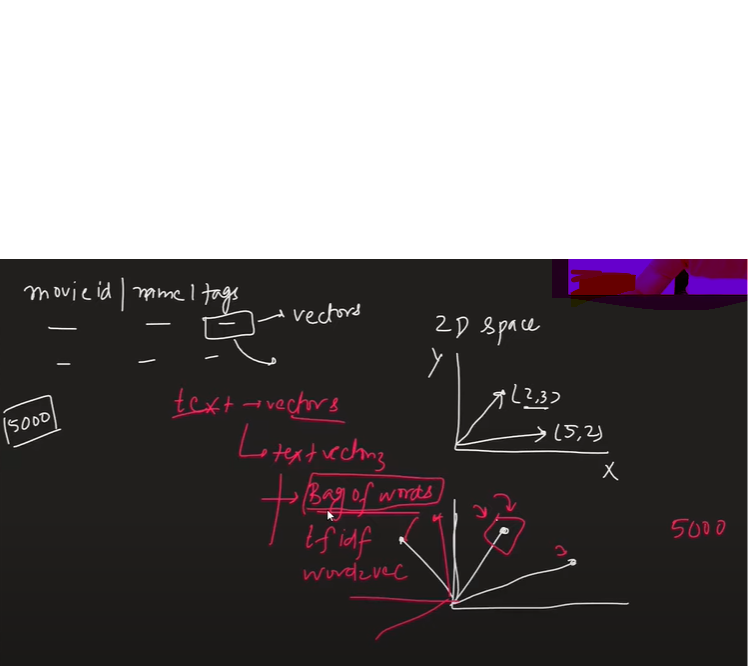

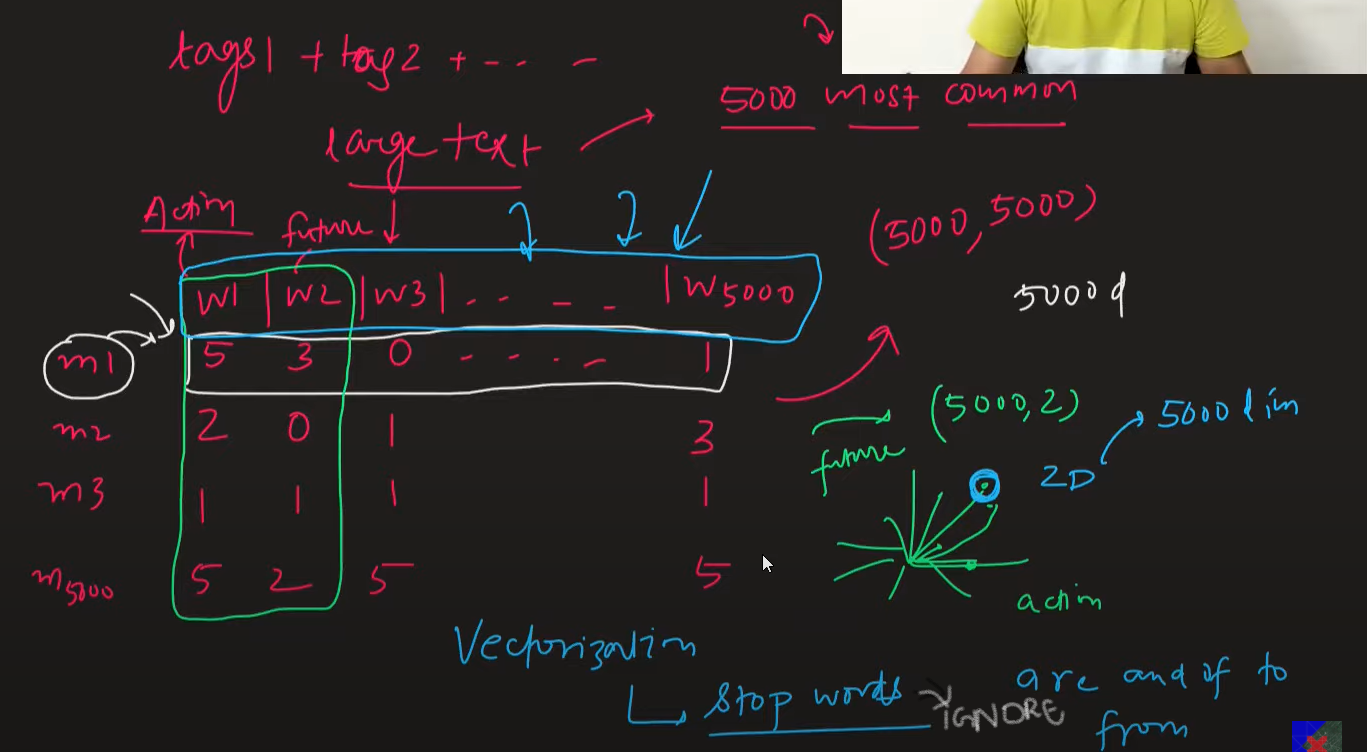

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
cv = CountVectorizer(max_features=5000, stop_words="english")

In [68]:
tags_vectors = cv.fit_transform(new_movies["tags"]).toarray()

In [69]:
tags_vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
similarity = cosine_similarity(tags_vectors)

In [77]:
similarity[0]

array([1.        , 0.08108108, 0.08458258, ..., 0.04559608, 0.        ,
       0.        ])

In [85]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

[(0, 0.9999999999999998),
 (1216, 0.2886216910815168),
 (3730, 0.26401000024165),
 (507, 0.2546858159868053),
 (2409, 0.2507061052819501),
 (582, 0.2484013136974297),
 (1204, 0.24784079854830487),
 (539, 0.2465984809580359),
 (1194, 0.23490461932490855),
 (778, 0.23249527748763854),
 (4048, 0.23089735286521348),
 (1920, 0.22830583024432843),
 (2786, 0.22568905807670636),
 (61, 0.22568905807670633),
 (972, 0.21369687880543226),
 (172, 0.2102998911698345),
 (2333, 0.2092457497388747),
 (322, 0.20795009796401454),
 (3608, 0.20712325533373332),
 (260, 0.20668850837512243),
 (4192, 0.2056773510573183),
 (1444, 0.20549873413169661),
 (1089, 0.20475971753873348),
 (74, 0.2032374384797152),
 (3675, 0.2005648842255601),
 (973, 0.20032733246124987),
 (47, 0.199363055707225),
 (577, 0.1973593560521103),
 (151, 0.19727878476642874),
 (1201, 0.19727878476642874),
 (2971, 0.19510570275964212),
 (942, 0.19391446622548786),
 (305, 0.19101436199010396),
 (4405, 0.18983159915049982),
 (4, 0.189831599150

In [86]:
new_movies[new_movies['title'] == 'The Dark Knight Rises'].index[0]

3

In [89]:
def recommend(movie):
    movie_index = new_movies[new_movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x : x[1])[1:6]
    
    for i in movie_list:
        print(new_movies.iloc[i[0]].title)

In [92]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Returns
Batman
Batman Forever
Batman Begins
